# My Energy Use Data Visualizations

The following plots can also be found on Plotly and on my website <a href='http://www.thetrainingset.com'>The Training Set</a>.  The data are my hourly electricity demand made available by BGE and Opower using the Green Button protocol.

In [1]:
import pandas as pd
print '\nPandas Version: ',pd.__version__

import numpy as np
print 'Numpy Version: ', np.__version__

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
print 'Matplotlib Version: ', matplotlib.__version__

import plotly.plotly as py
from plotly.graph_objs import *
#print 'Plot.ly Version: ', py.__version__

# My import functions to get a clean Pandas dataframe
import import_funcs
reload(import_funcs)


Pandas Version:  0.15.2
Numpy Version:  1.9.2
Matplotlib Version:  1.4.2


<module 'import_funcs' from 'import_funcs.pyc'>

In [2]:
# Pretty colors
gray_light = '#bbbbbb'
gray_med = '#737373'
red_orange = '#ff3700'
my_cyan = '#00CCFF'

In [3]:
# Import the BGE hourly electricity data and weather data using import_funcs.py class
#old_apt = import_funcs.BGEdata("old apt")
new_apt = import_funcs.BGEdata("new apt")
#weather = import_funcs.weather()

# Merge into one Pandas dataframe
#old_apt_and_weather = pd.merge(weather,old_apt,left_index=True,right_index=True)
#new_apt_and_weather = pd.merge(weather,new_apt,left_index=True,right_index=True)
#new_apt_and_weather = new_apt

new_apt.tail()

COST  NOTES            TYPE UNITS  USAGE  \
timestamp                                                        
2015-10-31 19:00:00  $0.09    NaN  Electric usage   kWh   0.62   
2015-10-31 20:00:00  $0.04    NaN  Electric usage   kWh   0.28   
2015-10-31 21:00:00  $0.01    NaN  Electric usage   kWh   0.09   
2015-10-31 22:00:00  $0.11    NaN  Electric usage   kWh   0.78   
2015-10-31 23:00:00  $0.18    NaN  Electric usage   kWh   1.29   

                          timestamp_end  
timestamp                                
2015-10-31 19:00:00 2015-10-31 19:59:00  
2015-10-31 20:00:00 2015-10-31 20:59:00  
2015-10-31 21:00:00 2015-10-31 21:59:00  
2015-10-31 22:00:00 2015-10-31 22:59:00  
2015-10-31 23:00:00 2015-10-31 23:59:00

# Hourly for Each Day

In [7]:
# Build hourly_array
# Rows: each day
# Cols: each hour

hourly_array = pd.DataFrame(np.zeros([len(new_apt['USAGE'].resample('d',how='sum')),24]),index=new_apt['USAGE'].resample('d',how='sum').index)

for i in range(0,24):
    if len(hourly_array[i]) == len(new_apt['USAGE'].ix[new_apt.index.hour==i]):
        hourly_array[i] = np.array(new_apt['USAGE'][new_apt.index.hour==i])
    #hourly_array[i] = np.array(new_apt['USAGE'][new_apt.index.hour==i])
    else:
        for j in range(0,len(new_apt['USAGE'].ix[new_apt.index.hour==i])):
            hourly_array[i].ix[j] = 1
            
            ## FIX THIS
            #new_apt['USAGE'].ix[new_apt['USAGE'].ix[pd.to_datetime[hourly_array.index]]]
                                                        
hourly_array.sort_index(ascending=True, inplace=True)
hourly_array.tail()

0     1   2     3     4     5     6     7     8     9   ...   \
timestamp                                                             ...    
2015-10-27  0.11  0.26   1  0.09  0.09  0.09  0.73  2.00  0.55  0.08  ...    
2015-10-28  0.14  0.11   1  0.11  0.08  0.11  1.90  3.28  0.67  0.38  ...    
2015-10-29  0.12  0.10   1  0.46  0.09  0.09  1.79  1.09  0.08  0.09  ...    
2015-10-30  0.41  0.09   1  0.09  0.09  0.10  1.04  2.31  0.10  0.21  ...    
2015-10-31  0.23  0.19   0  0.18  0.18  0.21  0.17  0.20  0.66  1.76  ...    

              14    15    16    17    18    19    20    21    22    23  
timestamp                                                               
2015-10-27  0.08  0.08  0.08  0.12  0.92  2.00  1.61  0.85  0.10  0.48  
2015-10-28  0.08  0.45  0.11  0.50  0.93  0.95  0.83  0.86  0.81  0.85  
2015-10-29  0.09  0.09  0.45  0.34  2.60  4.53  1.39  0.59  0.16  0.10  
2015-10-30  0.08  0.44  0.08  0.08  0.08  0.84  0.93  0.80  0.73  1.01  
2015-10-31  0.73  0.79  0.19  1.26  0.40  0.62  0.28  0.09  0.78  1.29  

[5 rows x 24 columns]

In [70]:
new_apt.ix[0]

COST                             NaN
NOTES                            NaN
TYPE                  Electric usage
UNITS                            kWh
USAGE                           0.04
timestamp_end    2014-05-24 00:59:00
Name: 2014-05-24 00:00:00, dtype: object

/Users/Justin/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/figure.py:1644: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.



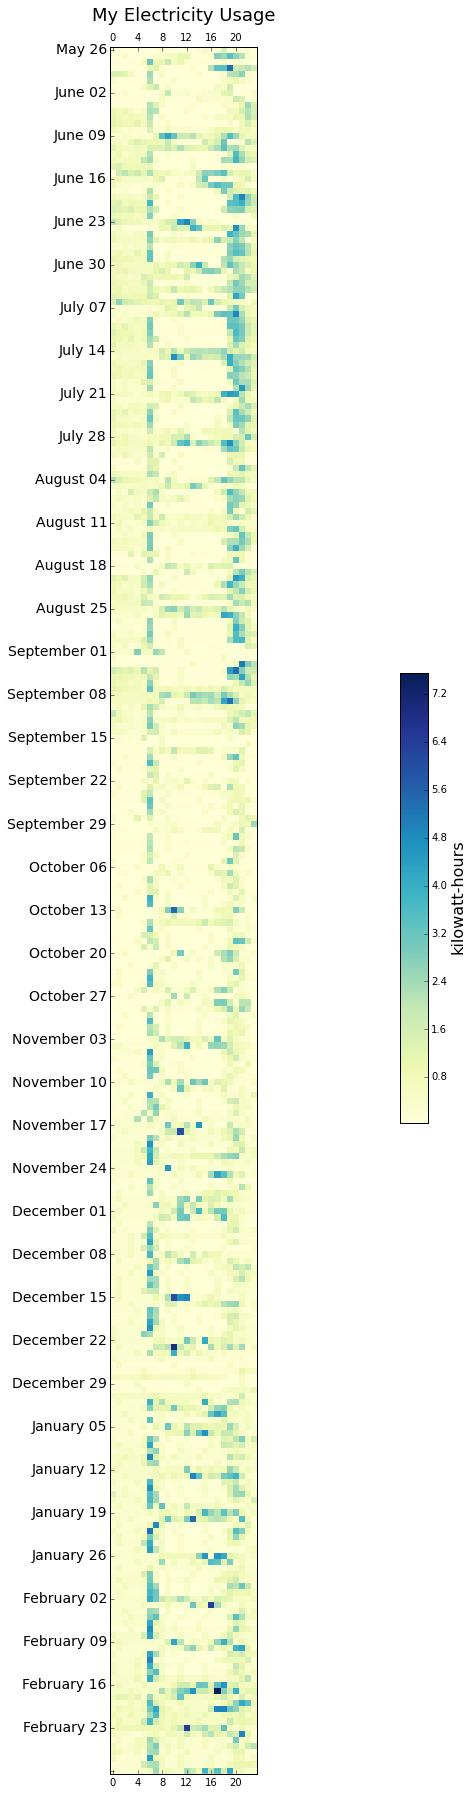

In [5]:
import matplotlib.dates as mdates

sundays = pd.Series(hourly_array[hourly_array.index.dayofweek==0].index)

fig, ax = plt.subplots(figsize=[10,25])
title('My Electricity Usage \n', fontsize=18)
plt.imshow(hourly_array, interpolation='none', cmap='YlGnBu')
plt.tick_params(axis="both", which="both", bottom="on", top="on",
                labelbottom="on", labeltop='on', left="on", right="off", labelleft="on") 
colorbar_ax = fig.add_axes([0.8, .375, .04, .25])
cb = plt.colorbar(cax = colorbar_ax)
cb.set_label('kilowatt-hours',fontsize = 16)

xticks = range(0,24,4)
yticks = range(0,len(hourly_array),7)

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_yticklabels(sundays.apply(lambda x: x.strftime('%B %d')), fontsize=14)
ax.yaxis_date()

#ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y')) This didn't work for me

plt.tight_layout()
plt.show()

#fig.savefig('my_usage_heatmap.png', bbox_inches='tight')


In [17]:
hourly_array

0     1   2   3   4   5   6   7   8   9  ...  14  15  16  17  \
timestamp                                              ...                   
2014-05-24  0.04  0.07   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-05-25  0.09  0.07   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-05-26  0.15  0.13   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-05-27  0.08  0.08   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-05-28  1.53  1.44   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-05-29  0.47  0.10   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-05-30  0.09  0.09   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-05-31  0.08  0.08   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-01  0.12  0.12   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-02  0.11  0.11   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-03  1.04  0.69   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-04  1.12  0.82   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-05  1.22  0.99   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-06  0.78  0.51   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-07  0.28  0.28   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-08  0.64  0.54   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-09  1.28  0.81   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-10  0.54  0.92   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-11  0.88  0.71   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-12  1.22  1.38   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-13  0.08  1.73   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-14  0.78  0.93   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-15  0.79  0.32   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-16  0.45  0.11   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-17  0.81  0.57   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-18  1.27  1.42   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-19  1.46  1.32   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-20  1.10  0.85   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-21  2.07  1.33   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2014-06-22  0.09  0.47   0   0   0   0   0   0   0   0 ...   0   0   0   0   
...          ...   ...  ..  ..  ..  ..  ..  ..  ..  .. ...  ..  ..  ..  ..   
2015-10-02  0.19  0.19   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2015-10-03  0.46  0.10   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2015-10-04  0.09  0.09   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2015-10-05  0.44  0.11   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2015-10-06  0.10  0.10   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2015-10-07  0.10  0.09   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2015-10-08  0.42  0.09   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2015-10-09  0.10  0.09   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2015-10-10  0.31  0.26   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2015-10-11  0.08  0.08   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2015-10-12  0.42  0.09   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2015-10-13  0.09  0.10   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2015-10-14  0.16  0.21   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2015-10-15  0.08  0.08   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2015-10-16  0.09  0.09   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2015-10-17  0.09  0.09   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2015-10-18  0.08  0.05   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2015-10-19  0.07  0.05   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2015-10-20  0.54  0.07   0   0   0  

## To Plot.ly

In [6]:
height = 1200
width = 400

data = Data([
    Heatmap(
        x = range(0,24,1),
        y = hourly_array.index,
        z = np.array(hourly_array),
        colorscale='YIGnBu',
        reversescale=True,
        colorbar = ColorBar(
            title = 'kWh',
            titleside='right')
    )
])
layout = Layout(
    yaxis = YAxis(autorange='reversed'),
    autosize = False,s
    width=width,
    height=height,
    font = Font(size=18)
)
fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='My Elec Use Heat Map')
#fig = Figure(data=data, layout=layout)
#plot_url = py.plot(fig, filename='YIGnBu-heatmap')

SSLError: [Errno 8] _ssl.c:507: EOF occurred in violation of protocol

# Daily Total by Week

Mon   Tues    Wed  Thurs    Fri    Sat    Sun
timestamp                                                  
2014-05-26  12.46  25.68  17.00   7.48   8.24   9.50   8.28
2014-06-02  12.09  16.34  16.03  12.65  12.88  34.12  22.44
2014-06-09  33.98  16.52  24.09  10.20  33.92  16.81  22.76
2014-06-16  15.07  22.25  26.37  25.47  10.69  26.03  29.15
2014-06-23  20.96  26.21  18.13  22.89  19.40  32.24  28.22
2014-06-30  20.47  19.01  30.58  19.25  33.93  17.85  30.53
2014-07-07  19.01  22.15  21.66  20.65  15.48  31.25  40.61
2014-07-14  22.37  20.21  19.83  16.44  16.78  29.20  18.26
2014-07-21  14.89  19.33  21.03  17.69  16.90  23.03  40.21
2014-07-28  19.52  11.83   8.39  13.73  13.94  27.80  19.37
2014-08-04  21.07  20.46  15.31  14.65  21.77  15.85  18.74
2014-08-11  15.72  20.31  18.68   9.39  10.02  14.92  15.97
2014-08-18  22.83  22.03  16.18  24.94  16.29  27.40  28.14
2014-08-25  12.96  15.39  16.83  20.14   9.15  12.12   3.26
2014-09-01  13.31  29.63  22.64  16.16  22.15  35.00  32.42
2014-09-08  15.58  14.94  18.09  16.67  13.56   4.78   3.32
2014-09-15  15.21  13.42  10.42   7.58   6.64   8.94  13.49
2014-09-22   9.22  10.93   8.64   8.99   8.53   8.66   8.71
2014-09-29  10.21   6.29   9.53   6.73  10.60   6.82  11.17
2014-10-06   8.87   8.37   7.84   9.87   8.19  22.09   7.47
2014-10-13  17.24   7.72   8.20  15.70   8.92  15.78  11.85
2014-10-20   6.30  11.39   9.34  10.65  16.50   9.56  17.28
2014-10-27  16.54   7.53   9.55   9.03   9.69  19.86  23.98
2014-11-03  12.90  10.81   9.09  12.06   8.99  22.27  12.19
2014-11-10  11.29  12.74  11.47  12.24  11.85  18.96  22.81
2014-11-17  17.24  14.00  16.85  26.90  13.49  12.97  20.36
2014-11-24   8.07   9.58  13.31  21.95  18.30  26.41  22.50
2014-12-01   7.94  12.12  13.96  12.12  10.05  17.61  19.29
2014-12-08  16.96  14.05  14.34  12.06  11.21  26.19  19.68
2014-12-15  11.51  13.28  14.06  13.35  12.73  21.20  30.92
...           ...    ...    ...    ...    ...    ...    ...
2015-03-30  15.16  11.01  13.56  14.97   9.25   3.28   3.60
2015-04-06   3.18   3.34   3.71   4.48  19.89  28.44  19.65
2015-04-13  15.78   8.46  10.83   9.68   7.81  17.57  12.70
2015-04-20  11.86  10.01   9.44  13.25   7.71  15.96  14.58
2015-04-27   8.66  11.29  10.22  10.78   8.95  24.02  19.46
2015-05-04   9.89  16.26  20.37  17.30  27.24   2.78  13.07
2015-05-11  20.44  26.25  10.03   9.49   7.10  22.12  38.44
2015-05-18  19.41  26.21  16.92  11.93  11.95  14.26  16.60
2015-05-25  19.15  21.42  26.31  23.40  25.15  31.09  38.08
2015-06-01  19.58  16.82   7.20   7.04   6.09  22.37  24.49
2015-06-08  17.30  24.52  21.51  20.48  24.84  52.09  38.18
2015-06-15  36.11  40.80  34.53  21.67  34.53  36.26  43.26
2015-06-22  26.73  34.62  29.39  20.32  20.88  38.75  11.74
2015-06-29   6.44  20.88  25.07  16.69  21.49  25.04  34.28
2015-07-06  20.65  31.67  25.35  22.24  27.42  25.53  28.23
2015-07-13  28.27  26.87  23.20  16.24  16.70  32.11  46.26
2015-07-20  21.05  21.71  33.52  23.83  11.86   2.63   9.74
2015-07-27  28.18  31.55  24.98  23.89  21.76  36.43  29.80
2015-08-03  28.09  26.67  27.82  20.76  21.25  18.64  22.03
2015-08-10  15.84  27.90  18.15  14.18  20.34  14.20  11.77
2015-08-17  35.46  20.40  25.53  19.69  19.16  17.94  30.38
2015-08-24  24.80  25.70  19.50   8.75  11.14  20.14  25.06
2015-08-31  21.44  23.77  31.41  22.02  32.24   7.86   3.24
2015-09-07  10.06  46.16  29.70  18.36  25.38  27.38  19.84
2015-09-14  13.69   8.32  16.37  20.40  14.15  26.00  22.50
2015-09-21  15.01   9.21  20.39  13.15  15.69  19.85  24.67
2015-09-28  14.39  13.64  29.95   6.83  10.37  18.12  25.06
2015-10-05  11.32  11.64  31.27   9.56  12.28  21.43  16.82
2015-10-12   9.62  10.63   7.41  11.37   8.34   5.62   3.14
2015-10-19   2.69   3.40   3.00   3.80   6.64  13.83  22.42

[74 rows x 7 columns]

In [14]:
new_apt['USAGE'].ix[new_apt['USAGE'].index.week == new_apt['USAGE'].index[-1].week]

timestamp
2015-02-23 00:00:00    0.26
2015-02-23 01:00:00    0.62
2015-02-23 02:00:00    0.26
2015-02-23 03:00:00    0.27
2015-02-23 04:00:00    0.64
2015-02-23 05:00:00    0.61
2015-02-23 06:00:00    2.43
2015-02-23 07:00:00    1.57
2015-02-23 08:00:00    0.70
2015-02-23 09:00:00    0.33
2015-02-23 10:00:00    0.34
2015-02-23 11:00:00    0.69
2015-02-23 12:00:00    0.36
2015-02-23 13:00:00    0.34
2015-02-23 14:00:00    0.36
...
2015-02-28 09:00:00    0.86
2015-02-28 10:00:00    0.54
2015-02-28 11:00:00    0.48
2015-02-28 12:00:00    2.38
2015-02-28 13:00:00    1.86
2015-02-28 14:00:00    0.85
2015-02-28 15:00:00    3.81
2015-02-28 16:00:00    1.87
2015-02-28 17:00:00    3.45
2015-02-28 18:00:00    1.61
2015-02-28 19:00:00    4.21
2015-02-28 20:00:00    0.55
2015-02-28 21:00:00    0.77
2015-02-28 22:00:00    0.32
2015-02-28 23:00:00    0.30
Name: USAGE, Length: 144

# Last Week Heat Map

In [4]:
last_week = pd.DataFrame(new_apt['USAGE'].ix[new_apt['USAGE'].index.week == new_apt['USAGE'].index[-1].week])
#last_week.plot()

# Change this if not a full week at end of month!!
week_index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']

# Change size of dataframe if not a full week at end of month!!
last_week_array = pd.DataFrame(np.zeros([6,24]))

for i in range(24):
    last_week_array[i] = np.array(last_week[last_week.index.hour==i])
    
last_week_array.index = week_index

ValueError: Length of values does not match length of index

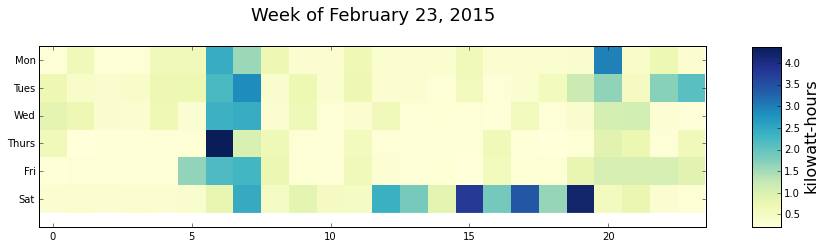

In [26]:

#sundays = pd.Series(array[array.index.dayofweek==0].index)

fig, ax = plt.subplots(figsize=[10,25])

title('Week of %s\n'%last_week.ix[0].name.strftime('%B %d, %Y'), fontsize=18)
plt.imshow(last_week_array, interpolation='none', cmap='YlGnBu')
colorbar_ax = fig.add_axes([1.05, 0.45, .04, .1])
cb = plt.colorbar(cax = colorbar_ax)
#plt.tick_params(axis="both", which="both", bottom="on", top="on",
#                labelbottom="on", labeltop='on', left="on", right="off", labelleft="on") 

cb.set_label('kilowatt-hours',fontsize = 16)

#xticks = range(0,24,4)
#yticks = range(0,len(array),7)

#ax.set_xticks(xticks)
ax.set_yticks(range(7))
ax.set_yticklabels(week_index, fontsize=10)
#ax.yaxis_date()

#ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y')) This didn't work for me

plt.tight_layout()
plt.show()

In [35]:
data = Data([
    Heatmap(
        x = range(0,24,1),
        y = last_week_array.index,
        z = np.array(last_week_array),
        colorscale='YIGnBu',
        reversescale=True)
])

layout = Layout(
    title='Week of %s <br>'%last_week.ix[0].name.strftime('%B %d, %Y'),
    yaxis = YAxis(autorange='reversed')
)
#plot_url = py.plot(data, filename='Last Week Heat Map')
fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='Last Week Heat Map')

# Average Week Hourly TS and Heat Map

In [38]:
groupby_day_hour = new_apt['USAGE'].groupby([new_apt.index.dayofweek,new_apt.index.hour])
avg_week_array = pd.DataFrame(np.zeros([6,24]))
for i in range(6):
    for j in range(24):
        avg_week_array[j].ix[i] = groupby_day_hour.get_group((i,j)).mean()
avg_week_array.index = week_index
 

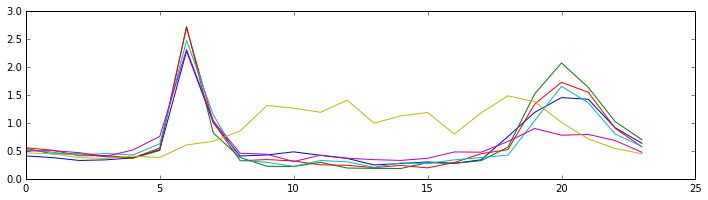

In [75]:
fig = plt.figure(figsize=[12,3]) 
ax1 = plt.subplot(1,1,1)

plot1 = plot(avg_week_array.transpose())
     

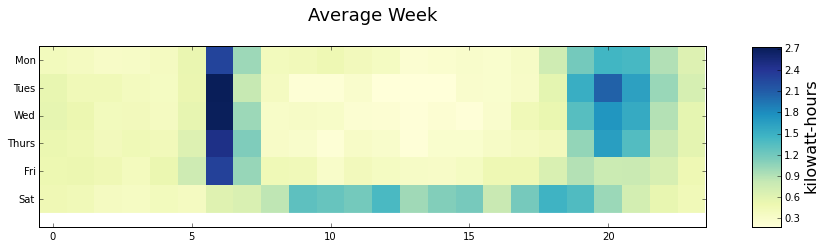

In [41]:
#sundays = pd.Series(array[array.index.dayofweek==0].index)

fig, ax = plt.subplots(figsize=[10,25])

title('Average Week\n', fontsize=18)
plt.imshow(avg_week_array, interpolation='none', cmap='YlGnBu')
colorbar_ax = fig.add_axes([1.05, 0.45, .04, .1])
cb = plt.colorbar(cax = colorbar_ax)
#plt.tick_params(axis="both", which="both", bottom="on", top="on",
#                labelbottom="on", labeltop='on', left="on", right="off", labelleft="on") 

cb.set_label('kilowatt-hours',fontsize = 16)

#xticks = range(0,24,4)
#yticks = range(0,len(array),7)

#ax.set_xticks(xticks)
ax.set_yticks(range(7))
ax.set_yticklabels(avg_week_array.index, fontsize=10)
#ax.yaxis_date()

#ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y')) This didn't work for me

plt.tight_layout()
plt.show()

## Stack these for Plotly

In [42]:
# String citing the data source
#url='http://donnees.ville.montreal.qc.ca/dataset/velos-comptage' 
#text_source = "Source and info: <a href=\"{}\">\
#Données ouvertes de la Ville de Montréal</a>".format(url)

font_size = 16
top_text = 'Week of %s\n'%last_week.ix[0].name.strftime('%B %d, %Y')
bottom_text = 'Average Week: %s through %s\n'% (new_apt.ix[0].name.strftime('%B %d, %Y'),
                                    new_apt.ix[len(new_apt)-1].name.strftime('%B %d, %Y')
                                    )


# Annotation generating function, 
#  to be used in all plots in this section
def top_title(x=.5, y=1, text=top_text):
    return Annotation(
        text=text,          # annotation text
        showarrow=False,    # remove arrow 
        xref='paper',     # use paper coords
        yref='paper',     #  for both coordinates
        xanchor='center',  # x-coord line up with right end of text 
        yanchor='bottom', # y-coord line up with bottom end of text 
        x=x,              # position's x-coord
        y=y,               #   and y-coord
        font = Font(size = font_size)
    )

# Annotation generating function, 
#  to be used in all plots in this section
def bottom_title(x=.5, y=.45, text=bottom_text):
    return Annotation(
        text=text,          # annotation text
        showarrow=False,    # remove arrow 
        xref='paper',     # use paper coords
        yref='paper',     #  for both coordinates
        xanchor='center',  # x-coord line up with right end of text 
        yanchor='bottom', # y-coord line up with bottom end of text 
        x=x,              # position's x-coord
        y=y,               #   and y-coord
        font = Font(size = font_size)
    )

In [44]:
height = 600
width = 800

zmin = 0
zmax = 5

heatmap_avg = Heatmap(
    x = range(0,24,1),
    y = avg_week_array.index,
    z = np.array(avg_week_array),
    colorscale='YIOrRd',
    reversescale=True,
    zauto=False,
    zmin = zmin,
    zmax = zmax
)

heatmap_last_week = Heatmap(
    x = range(0,24,1),
    y = last_week_array.index,
    z = np.array(last_week_array),
    colorscale='YIOrRd',
    yaxis = 'y2',
    reversescale=True,
    zauto=False,
    zmin = zmin,
    zmax = zmax,
    colorbar = ColorBar(
        title = 'kWh',
        titleside='right'
        )
)

data = Data([heatmap_avg, heatmap_last_week])

layout = Layout(  
    autosize = False,
    height = height,
    width = width,
    yaxis = YAxis(domain=[0, .45], 
                  autorange='reversed'
                  ),
    yaxis2 = YAxis(domain=[.55, 1], 
                   autorange='reversed'
                   ),
    annotations = Annotations([top_title(),bottom_title()])
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='Avg Week Last Week Heatmap Comparison')

# Line plot - each line is hourly plot of kWh for one day. <br> Most recent days and the average day highlighted.

In [46]:
# Define a function to calculate average weekday and weekend

def avg_day(df,start_date,end_date):
    # df is pandas df, has 'USAGE' and 'tempF' fields, indexed by pandas datetime
    # date_range is string for .ix call
    # returns average_day
    # average_day[True
    
    df_dates = df.ix[start_date:end_date]
    
    # First groupby weekday/weekend and hour of day
    weekday_weekend_hour = df_dates.groupby([(df_dates.index.dayofweek==5)|(df_dates.index.dayofweek==6),df_dates.index.hour])

    # Calculate an average weekday and average weekend by hour (electricity and outdoor temp)
    average_days = pd.DataFrame(weekday_weekend_hour['USAGE'].mean()) #,weekday_weekend_hour['tempF'].mean()])
    
    average_weekend = average_days.ix[True]
    average_weekday = average_days.ix[False]

    return average_weekday, average_weekend

In [47]:
weekday_newapt, weekend_newapt = avg_day(new_apt,'24-may-2014','15-feb-2015')
average_day = new_apt['USAGE'].groupby(new_apt.index.hour).mean()

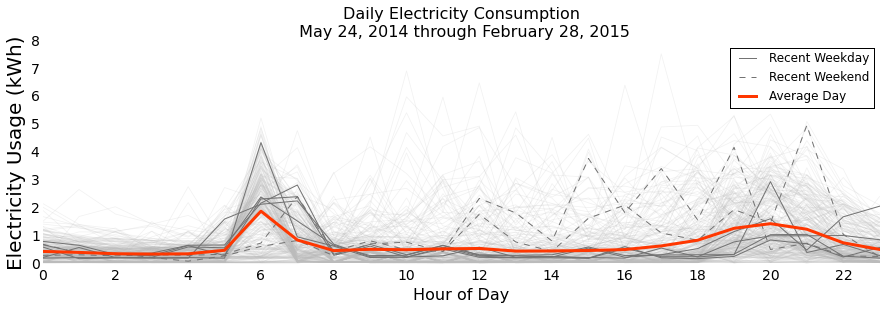

In [73]:
import plotly.tools as tls
fig = plt.figure(figsize=[15,4])
ax1 = plt.subplot(111)

recent_color = gray_med
avg_day_color = red_orange
weekend_linestyle = 'dashed'

for row in range(len(hourly_array)):
    hourly_array.ix[row].plot(color=gray_light,alpha=.2,linewidth=0.75)

for row in range(len(hourly_array)-7, len(hourly_array)):
    if (hourly_array.ix[row].name.dayofweek == 5) | (hourly_array.ix[row].name.dayofweek==6):
        hourly_array.ix[row].plot(linestyle=weekend_linestyle, marker='',color=recent_color, linewidth=1)
    else:
        hourly_array.ix[row].plot(marker='',color=recent_color, linewidth=1)
    
plot_avg_all = average_day.plot(marker='', color=avg_day_color, linewidth=3, grid='off', label='Average Day')

plt.ylim(ymin=0,ymax=8)
plt.xlim(xmax=23)
plt.xticks(np.arange(0,23,2),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Hour of Day',fontsize=16)

ylabel('Electricity Usage (kWh)',fontsize=20)
title('Daily Electricity Consumption \n %s through %s'
      %(hourly_array.ix[0].name.strftime('%B %d, %Y'),
        hourly_array.ix[len(hourly_array)-1].name.strftime('%B %d, %Y')),
fontsize=16)

# manually building legend
import matplotlib.lines as mlines

recent_weekday_line = mlines.Line2D([], [], 
                                    color=recent_color, 
                                    marker='', 
                                    label='Recent Weekday')
recent_weekend_line = mlines.Line2D([], [], 
                                    linestyle=weekend_linestyle,
                                    color=recent_color, 
                                    marker='', 
                                    label='Recent Weekend')
avg_day_line = mlines.Line2D([], [],
                                    color=avg_day_color, 
                                    marker='', 
                                    linewidth=3,
                                    label='Average Day')

plt.legend(handles=[recent_weekday_line, recent_weekend_line, avg_day_line], loc='upper right')

ax1.spines["top"].set_visible(False)  
ax1.spines["bottom"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
ax1.spines["left"].set_visible(False)
ax1.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="on", left="off", right="off", labelleft="on",labelsize=14)


plt.show()
fig.savefig('plots/Days_thru_28-Feb-2015.png',bbox_inches='tight')
#plot_url = py.plot_mpl(fig, update=update)